## Assignment 1
### Name: Barun Parua
### Roll Number: 21CS10014

In [67]:
# importing all the necessary libraries
# pandas for reading the csv file, numpy for mathematical operations, matplotlib for plotting the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
# extracting the data from the csv file, checking the shape of the data and splitting the data into x and y values
df = pd.read_csv('../../dataset/linear-regression.csv')
print(df.shape)

# randomizing the dataset
df = df.sample(frac=1).reset_index(drop=True)

# splitting the data into x and y values
x_total = df.iloc[:, :-1].values
y_total = df.iloc[:, -1].values

(1599, 12)


In [69]:
# normalise the data
for i in range(0, len(x_total[0])):
    mean = np.mean(x_total[:, i])
    std = np.std(x_total[:, i])
    x_total[:, i] = (x_total[:, i] - mean) / std
    
# print(x_total)

In [70]:
# split the data into train, test and validation set
train_size = int(0.5 * len(x_total))
validation_size = int(0.3 * len(x_total))
test_size = int(0.2 * len(x_total))

x_train = x_total[:train_size]
x_validation = x_total[train_size:train_size+validation_size]
x_test = x_total[train_size+validation_size:]

y_train = y_total[:train_size]
y_validation = y_total[train_size:train_size+validation_size]
y_test = y_total[train_size+validation_size:]

In [71]:
# analytical solution
x_train = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
print(x_train.shape)
theta = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
print(theta)

(799, 12)
[ 5.63245835  0.14179053 -0.24735778 -0.09622653  0.03703062 -0.07640095
  0.0300501  -0.06084234 -0.05882721 -0.05851568  0.11138102  0.31655218]


In [72]:
# apply the linear regression model on the test data
x_test = np.hstack((np.ones((x_test.shape[0],1)), x_test))

y_pred = np.dot(x_test, theta)

mse = np.mean((y_test - y_pred)**2)
print("Mean Squared Error: ", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

# calculate the R2 score
ssr = np.sum((y_test - y_pred)**2)
sst = np.sum((y_test - np.mean(y_test))**2)
r2_score = 1 - (ssr/sst)
print("R2 Score: ", r2_score)

Mean Squared Error:  0.42388068332217443
Root Mean Squared Error:  0.6510611978317971
R2 Score:  0.2698580827448984


In [73]:
# gradient descent method

def cost(x,y,theta):
    return np.sum((x.dot(theta)-y)**2)/len(y)

def gradient_descent(x,y,theta,learning_rate):
    return theta - learning_rate * x.T.dot(x.dot(theta)-y)/len(y)

[ 5.62582153 -0.13126583 -0.3311301  -0.21183147 -0.07113733 -0.05899217
 -0.02774651  0.0158511   0.28856573 -0.22793844  0.05241478  0.55064345]
Mean Squared Error:  0.45982571225009927
Root Mean Squared Error:  0.6781044995058647
R2 Score:  0.20794213948574924


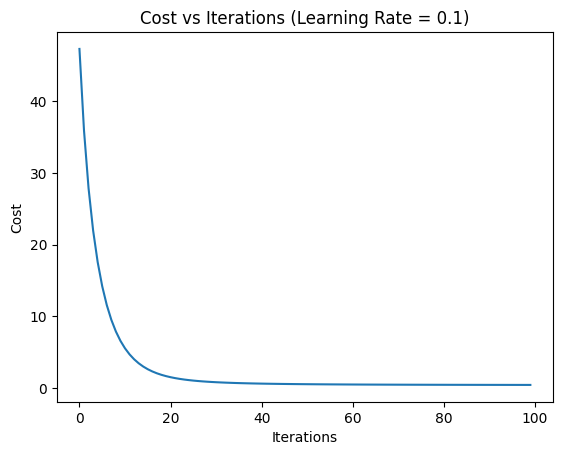

In [74]:
theta_grad = np.random.randn(x_total.shape[1]+1)
costs = []
learning_rate = 0.1
for i in range(100):
    costs.append(cost(x_train, y_train, theta_grad))
    theta_grad = gradient_descent(x_train, y_train, theta_grad, learning_rate)
print(theta_grad)


y_pred = np.dot(x_test, theta_grad)

mse = np.mean((y_test - y_pred)**2)
print("Mean Squared Error: ", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

# calculate R2 score
ssr = np.sum((y_test - y_pred)**2)
sst = np.sum((y_test - np.mean(y_test))**2)
r2_score = 1 - (ssr/sst)
print("R2 Score: ", r2_score)

# plot the cost vs iterations
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations (Learning Rate = 0.1)')
plt.show()

[ 5.63467053  0.19930771 -0.21047626 -0.04344177  0.07540459 -0.09341571
  0.07655004 -0.12046557 -0.16888375 -0.02934606  0.13385295  0.23462111]
Mean Squared Error:  0.4206915516760475
Root Mean Squared Error:  0.6486073940960336
R2 Score:  0.27535141798308915


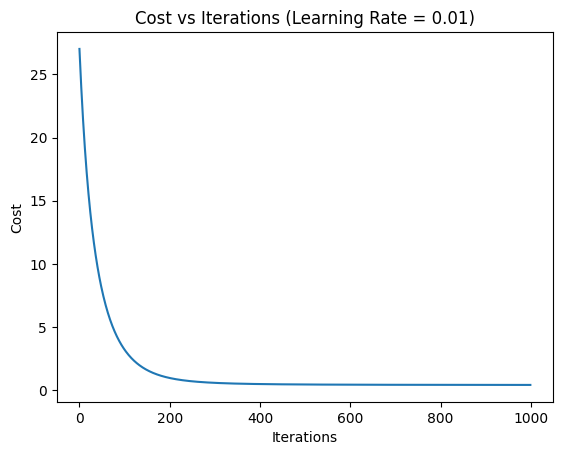

In [75]:
theta_grad = np.random.randn(x_total.shape[1]+1)
costs = []
learning_rate = 0.01
for i in range(1000):
    costs.append(cost(x_train, y_train, theta_grad))
    theta_grad = gradient_descent(x_train, y_train, theta_grad, learning_rate)
print(theta_grad)


y_pred = np.dot(x_test, theta_grad)

mse = np.mean((y_test - y_pred)**2)
print("Mean Squared Error: ", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

# calculate R2 score
ssr = np.sum((y_test - y_pred)**2)
sst = np.sum((y_test - np.mean(y_test))**2)
r2_score = 1 - (ssr/sst)
print("R2 Score: ", r2_score)

# plot the cost vs iterations
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations (Learning Rate = 0.01)')
plt.show()

[ 5.63379657  0.28415847 -0.30927501 -0.20683183  0.05869131 -0.03473275
 -0.06161958  0.05073996 -0.11025478  0.00707887  0.10567424  0.31716936]
Mean Squared Error:  0.46383616809052847
Root Mean Squared Error:  0.6810551872576323
R2 Score:  0.20103405890645032


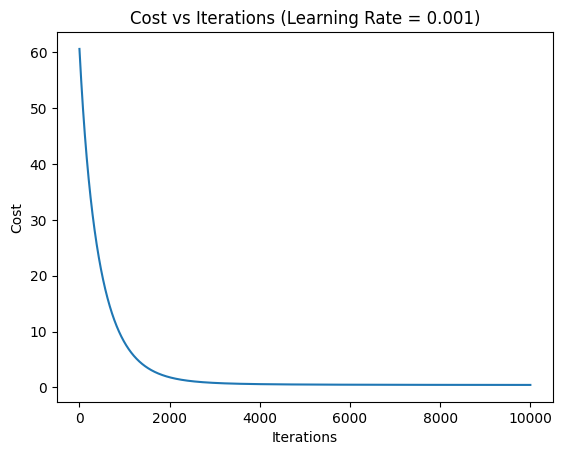

In [76]:
theta_grad = np.random.randn(x_total.shape[1]+1)
costs = []
learning_rate = 0.001
for i in range(10000):
    costs.append(cost(x_train, y_train, theta_grad))
    theta_grad = gradient_descent(x_train, y_train, theta_grad, learning_rate)
print(theta_grad)


y_pred = np.dot(x_test, theta_grad)

mse = np.mean((y_test - y_pred)**2)
print("Mean Squared Error: ", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

# calculate R2 score
ssr = np.sum((y_test - y_pred)**2)
sst = np.sum((y_test - np.mean(y_test))**2)
r2_score = 1 - (ssr/sst)
print("R2 Score: ", r2_score)

# plot the cost vs iterations
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations (Learning Rate = 0.001)')
plt.show()

[ 5.63097606  0.11474763 -0.25058909 -0.09902829  0.02130883 -0.07367114
  0.02544868 -0.05287998 -0.02110279 -0.06880454  0.10432689  0.341854  ]
Mean Squared Error:  0.42397534182618396
Root Mean Squared Error:  0.6511338893239884
R2 Score:  0.2696950318102337


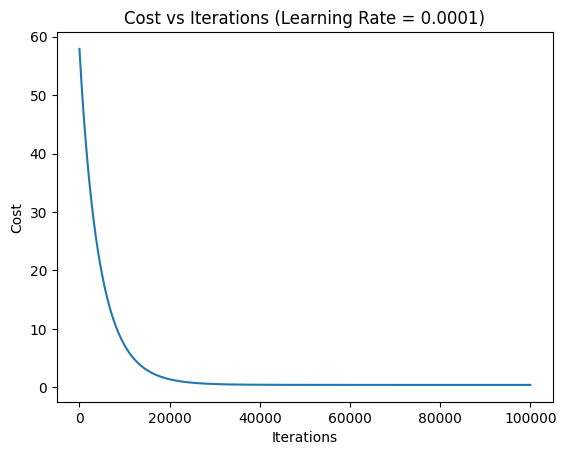

In [77]:
theta_grad = np.random.randn(x_total.shape[1]+1)
costs = []
learning_rate = 0.0001
for i in range(100000):
    costs.append(cost(x_train, y_train, theta_grad))
    theta_grad = gradient_descent(x_train, y_train, theta_grad, learning_rate)
print(theta_grad)


y_pred = np.dot(x_test, theta_grad)

mse = np.mean((y_test - y_pred)**2)
print("Mean Squared Error: ", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

# calculate R2 score
ssr = np.sum((y_test - y_pred)**2)
sst = np.sum((y_test - np.mean(y_test))**2)
r2_score = 1 - (ssr/sst)
print("R2 Score: ", r2_score)

# plot the cost vs iterations
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations (Learning Rate = 0.0001)')
plt.show()